               Slug     Base  -6  -5  -4  -3  -2  -1  0  1  2  3  4   5   6
2     pixi-viewport  2023-04   0   0   0   0   0   0  1  0  0  0  0   0   0
15    mingyaulee-gh  2023-10   0   0   0   0   0   0  1  0  0  0  0   0   0
18            odiff  2023-03   0   0   0   0   0   0  1  0  0  0  0   0   0
25           keyviz  2023-03   0   0   0   0   0   0  1  0  0  0  0   0   1
35           nestia  2023-02   0   0   0   0   0   0  3  1  1  4  4   3   2
...             ...      ...  ..  ..  ..  ..  ..  .. .. .. .. .. ..  ..  ..
1805  nix-community  2023-02   0   0   0   0   0   0  2  1  4  8  9  11  10
1811      greenshot  2023-06   0   0   0   0   0   0  1  0  1  0  0   0   2
1812        linkace  2023-12   0   0   0   0   0   0  1  1  1  1  1   0   0
1818         unocss  2023-05   0   0   0   0   0   0  3  0  1  2  1   0   2
1827  react-uploady  2023-05   0   0   0   0   0   0  1  0  0  0  0   0   0

[252 rows x 15 columns]
                 Slug     Base  Period  Sponsor_Count
48       

<Figure size 4200x3000 with 0 Axes>

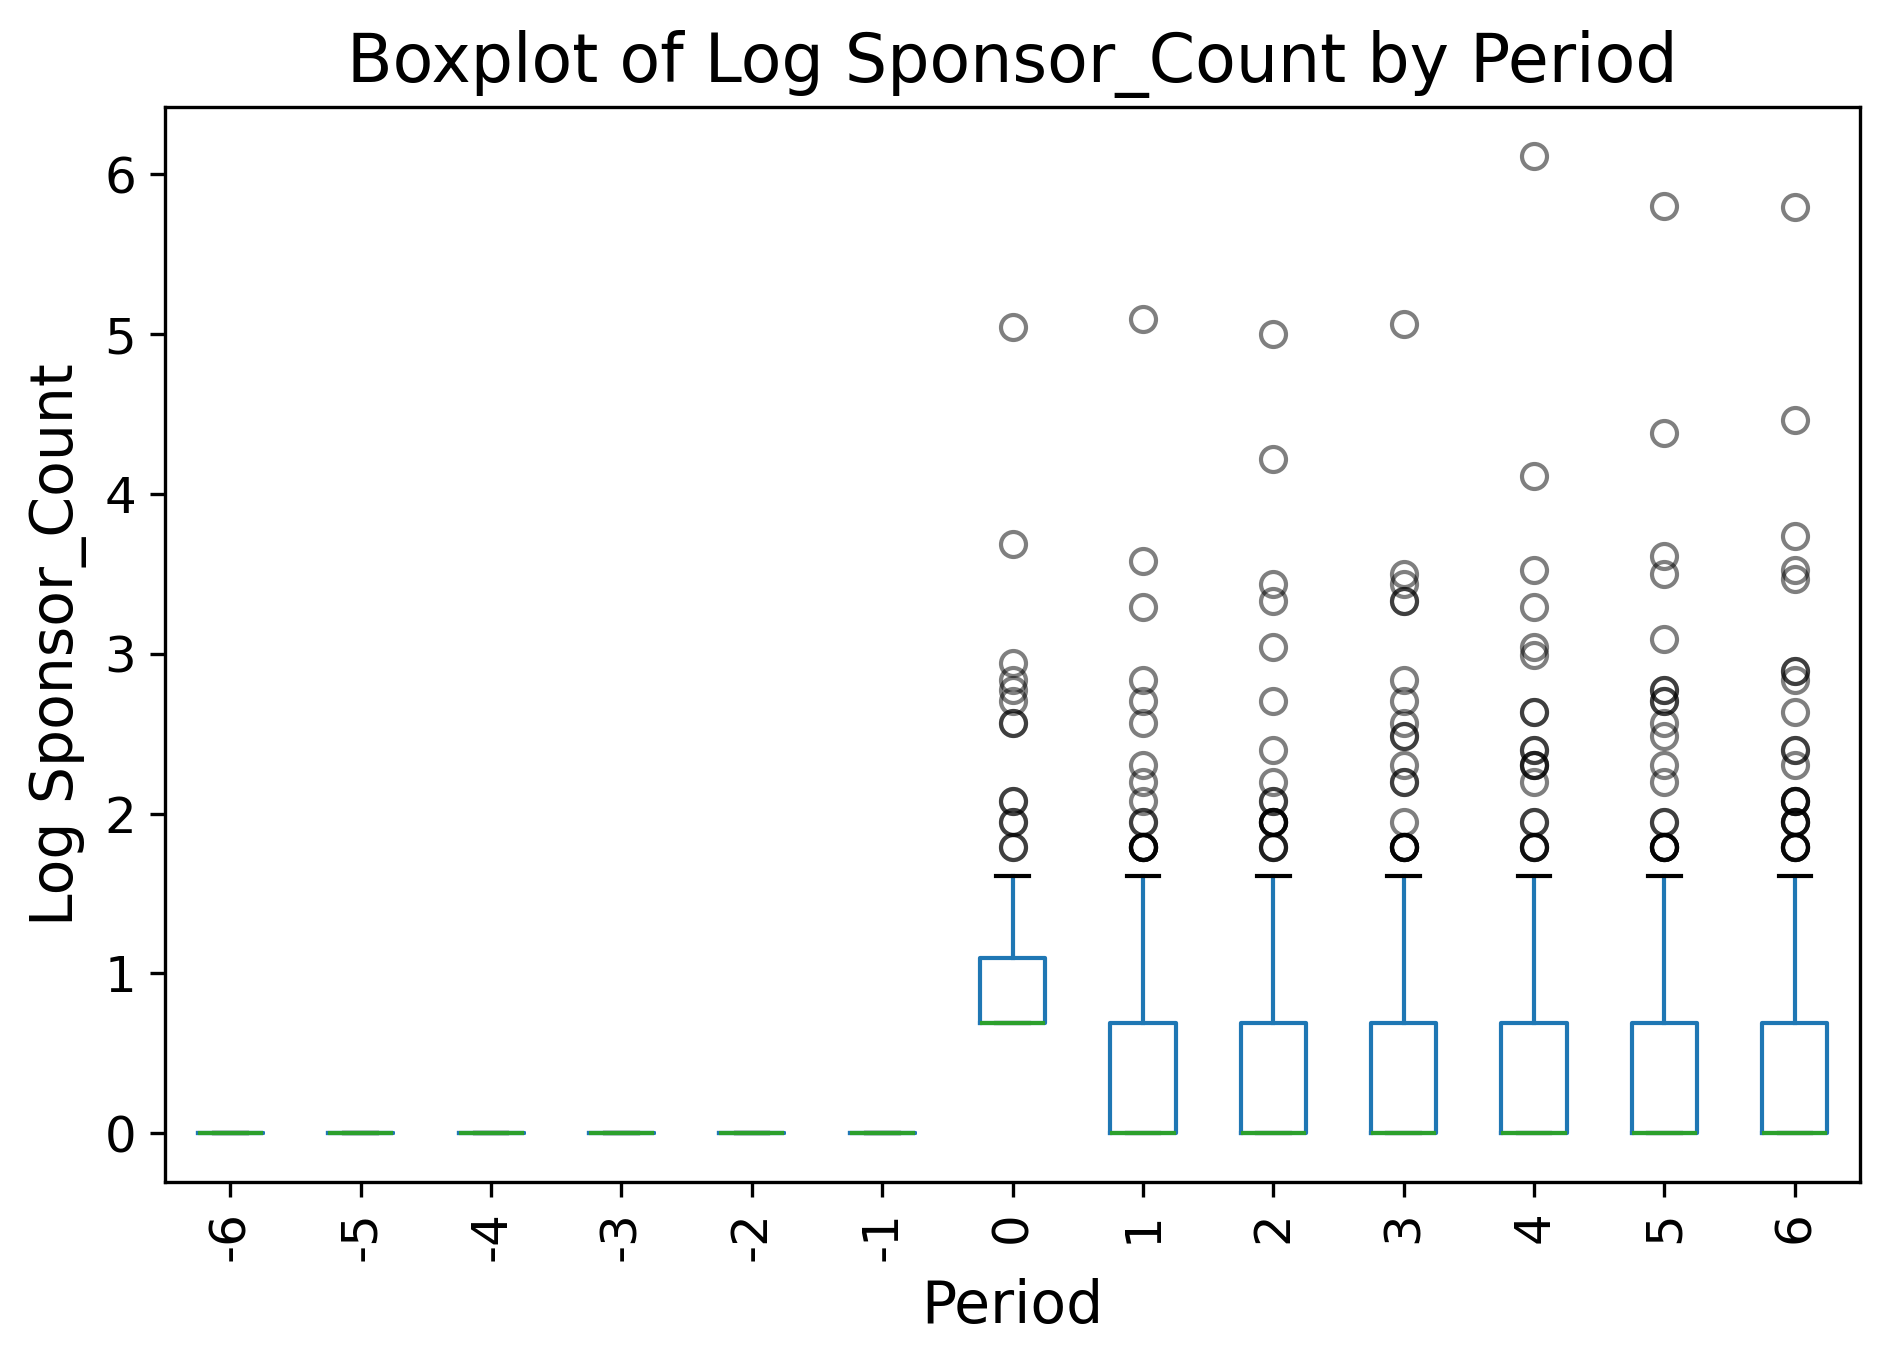

In [ ]:
# 数据筛选

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot


def generate_boxplot(file_path, value_name, output_prefix):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 排除全零行
    df = df.loc[(df != 0).any(axis= 1)] 
    
    # 如果一行在0的值等于0，排除这一行
    df = df.loc[(df['0'] > 0)]
    
    # 如果一行在-6到-1的值存在大于0的值，排除这一行
    df = df.loc[(df['-6'] == 0) & (df['-5'] == 0) & (df['-4'] == 0) & (df['-3'] == 0) & (df['-2'] == 0) & (df['-1'] == 0)]
    print(df)
    
    # 将剩余行的Slug名单保存到文件
    df['Slug'].to_csv(f'../../data/RQ3/{output_prefix}_slug.csv', index=False)
    
    # 将数据转换为适合绘图的格式
    df_melted = df.melt(id_vars=['Slug', 'Base'], var_name='Period', value_name=value_name)
    
    # 将 Period 列转换为数值类型并排序
    df_melted['Period'] = pd.to_numeric(df_melted['Period'], errors='coerce')
    df_melted = df_melted.sort_values(by='Period')
    print(df_melted)
    
    # 对 value_name 取对数
    df_melted[f'{value_name}(Count)'] = np.log1p(df_melted[value_name])
    
    # 自定义离群点样式
    flierprops = dict(marker='o', color='r', alpha=0.5)


    # 生成箱型图
    plt.figure(figsize=(14, 10))
    df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops)

    # 美化图表
    plt.xlabel('Period', fontsize=14)
    plt.ylabel(f'Log {value_name}', fontsize=14)
    plt.title(f'Boxplot of Log {value_name} by Period', fontsize=16)
    plt.suptitle('')  # 去掉默认的副标题
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # 保存图表
    plt.savefig(f'../graph/{output_prefix}_boxplot.png')
    plt.show()
    
    # 将df保存为新的csv
    df_melted.to_csv(f'../../data/RQ3/{output_prefix}_info.csv', index=False)


generate_boxplot('../data/sponsor_info.csv', 'Sponsor_Count', 'sponsor')

               Slug     Base    -6    -5    -4    -3    -2    -1     0     1  \
2     pixi-viewport  2023-04     7    19     2    14    14     5     0     0   
15    mingyaulee-gh  2023-10     0     0     0     0    17     8    19     1   
18            odiff  2023-03     1     0     3     2     0     0     3     0   
25           keyviz  2023-03     2     0     0    22    11     9    13    10   
35           nestia  2023-02    12     4    11     6    38    31    18    44   
...             ...      ...   ...   ...   ...   ...   ...   ...   ...   ...   
1805  nix-community  2023-02  1567  1388  1725  1786  2304  2315  1651  1943   
1811      greenshot  2023-06     0     0     0     3     1     0     0     0   
1812        linkace  2023-12    10     7     2     1     7    12     0     0   
1818         unocss  2023-05    96    62    92   186    86   240   128   106   
1827  react-uploady  2023-05    15     4     2    34     9     1     0     0   

         2     3     4     5     6  
2 

<Figure size 4200x3000 with 0 Axes>

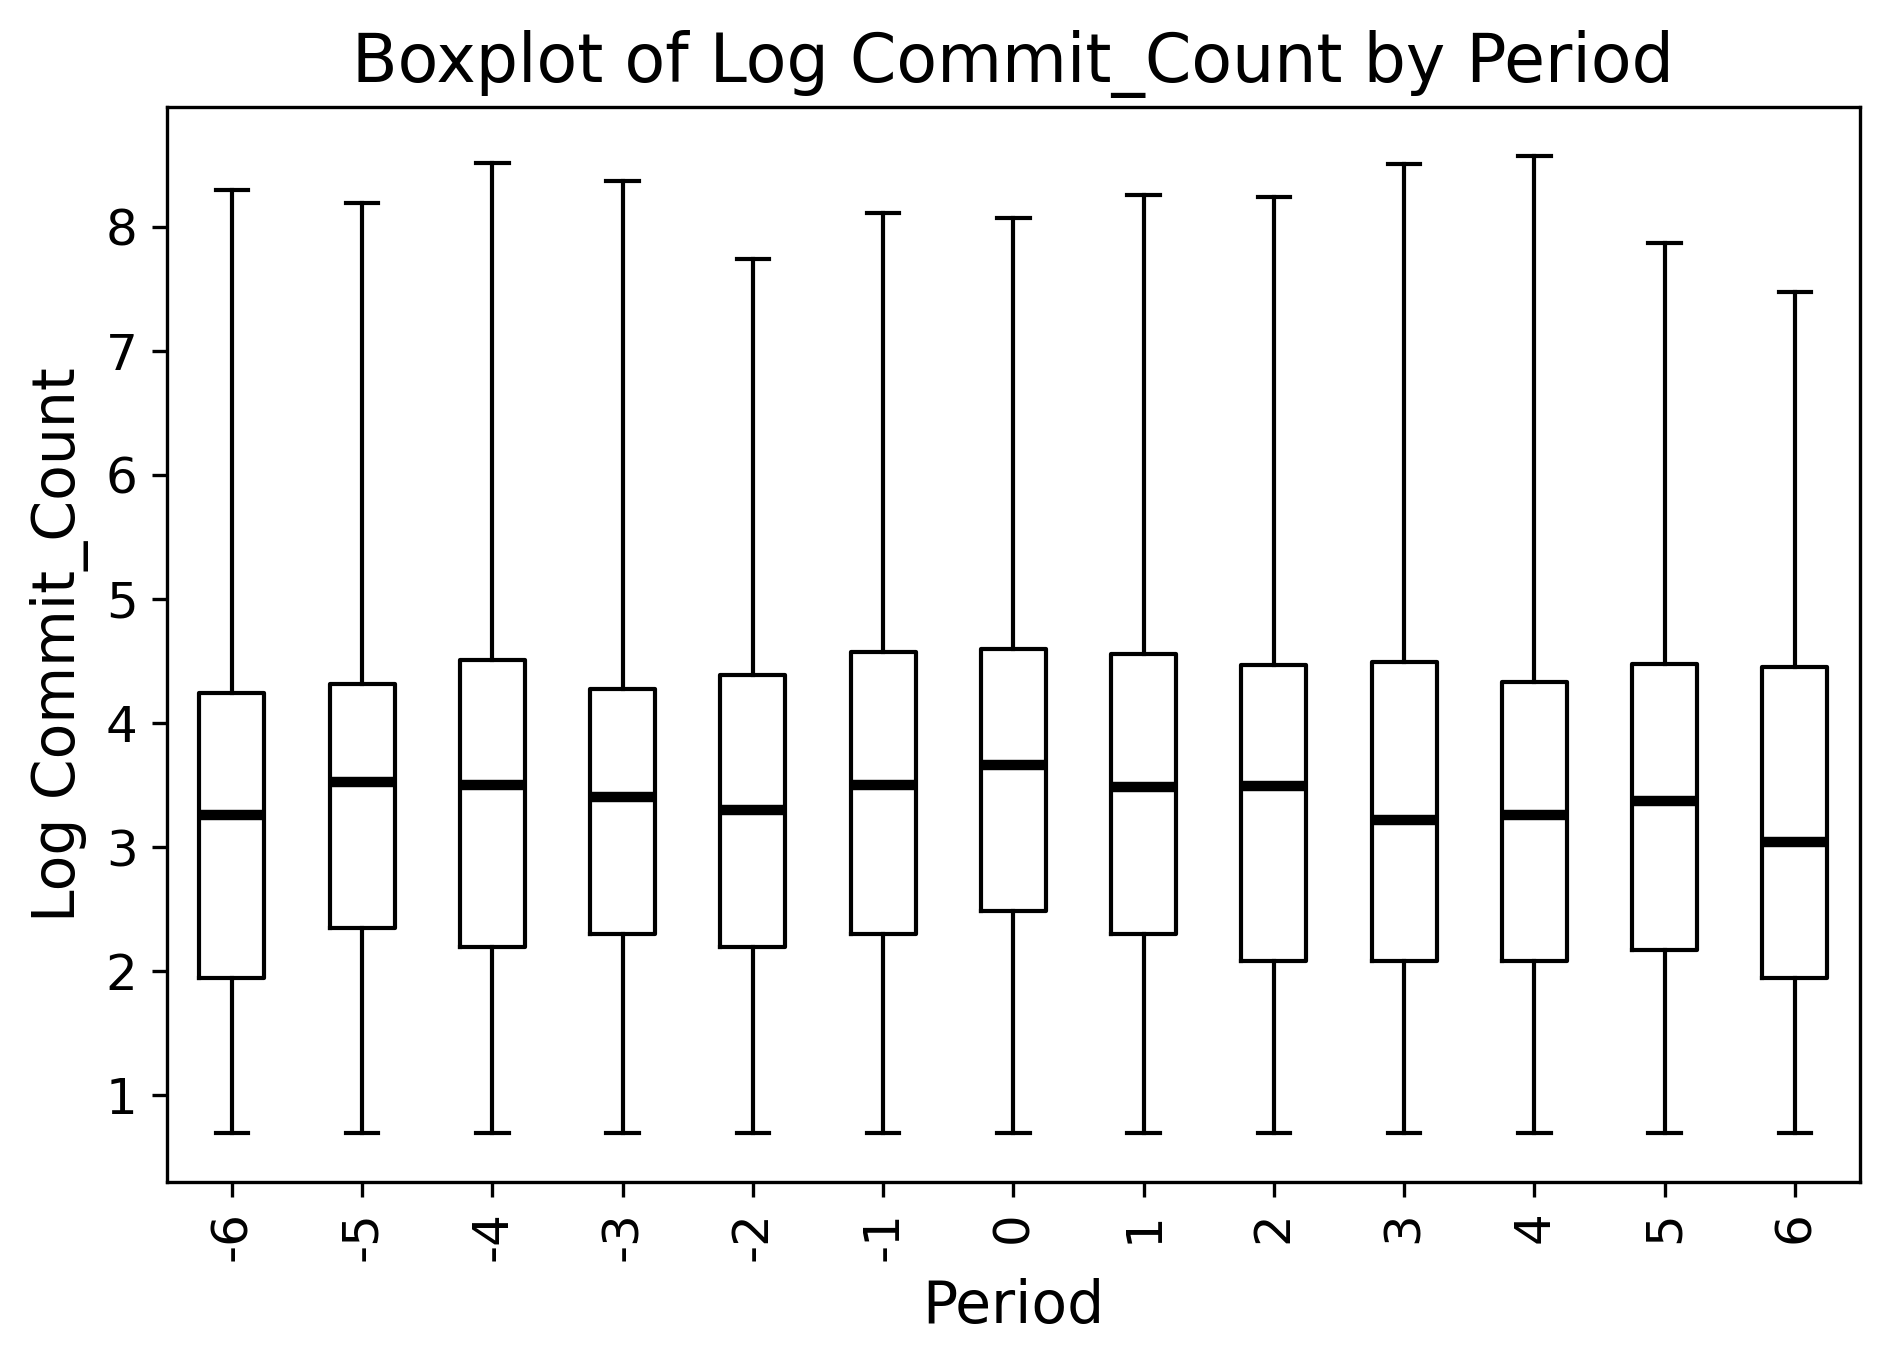

               Slug     Base  -6  -5  -4  -3  -2  -1  0  1  2  3  4   5   6
2     pixi-viewport  2023-04   0   0   0   0   0   0  1  0  0  0  0   0   0
15    mingyaulee-gh  2023-10   0   0   0   0   0   0  0  0  0  0  0   0   0
18            odiff  2023-03   0   0   0   0   0   0  1  0  0  0  0   0   0
25           keyviz  2023-03   0   0   0   0   0   0  1  0  0  0  0   0   1
35           nestia  2023-02   0   0   0   0   0   0  3  1  1  4  4   3   2
...             ...      ...  ..  ..  ..  ..  ..  .. .. .. .. .. ..  ..  ..
1805  nix-community  2023-02   0   0   0   0   0   0  2  1  4  9  9  11  10
1811      greenshot  2023-06   0   0   0   0   0   0  1  0  1  0  0   0   2
1812        linkace  2023-12   0   0   0   0   0   0  1  2  2  2  2   0   0
1818         unocss  2023-05   0   0   0   0   0   0  2  0  1  2  1   0   2
1827  react-uploady  2023-05   0   0   0   1   0   0  1  0  0  0  0   0   0

[252 rows x 15 columns]
                 Slug     Base  Period  Spend_Count
48        h

<Figure size 4200x3000 with 0 Axes>

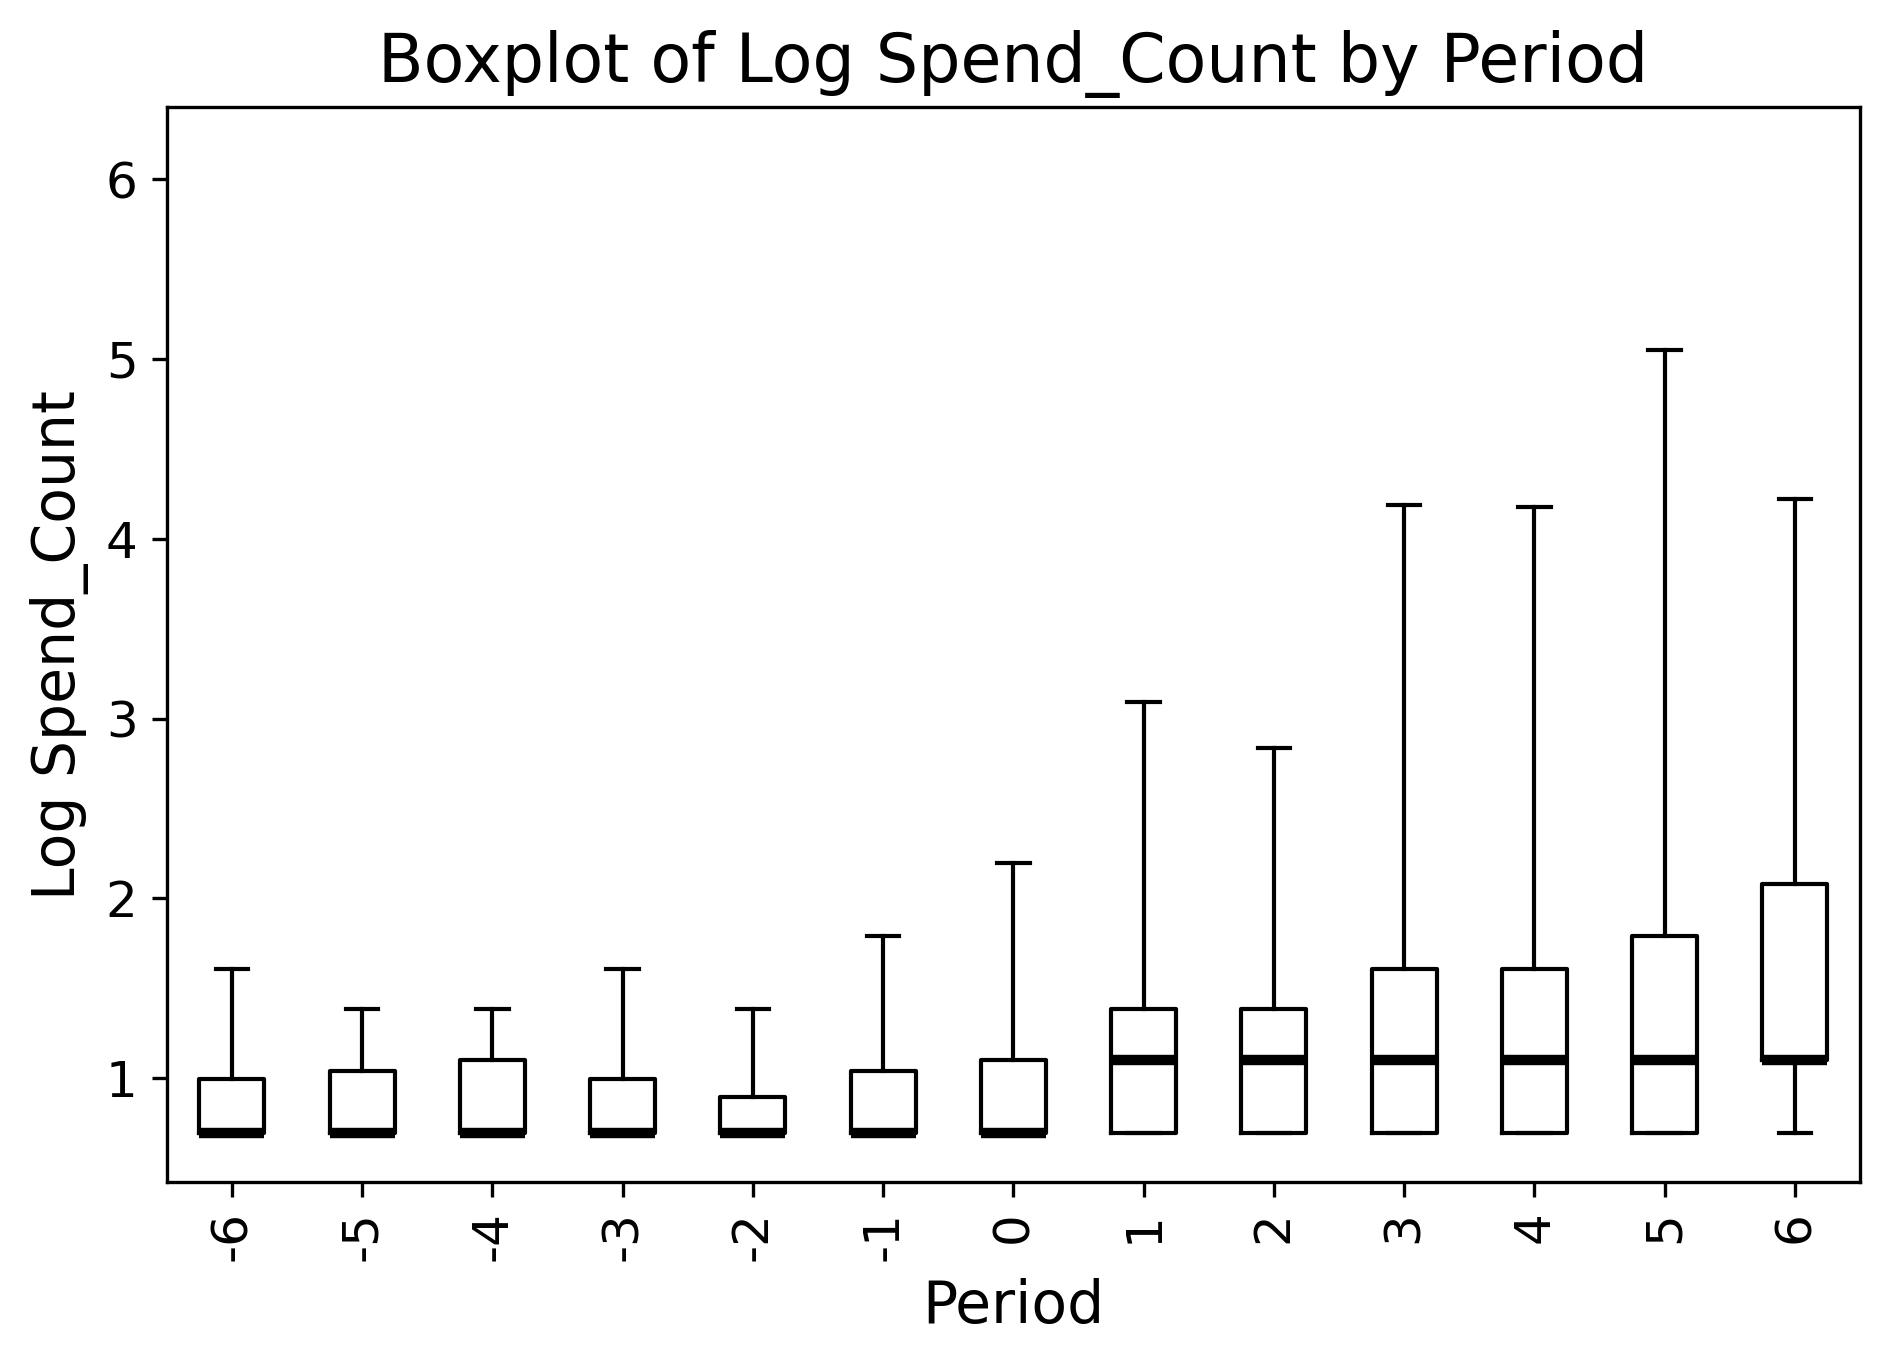

               Slug     Base  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5  \
2     pixi-viewport  2023-04   0   1   3   5   2   2   2   1   2   3   3   4   
15    mingyaulee-gh  2023-10   0   0   0   0   0   0   0   0   0   0   0   0   
18            odiff  2023-03   0   0   0   1   1   0   0   0   0   0   1   0   
25           keyviz  2023-03   1   0   0   1   0   1   1   2   1   1   3   0   
35           nestia  2023-02   0   0   0   0   2   0   0   0   1   1   5   1   
...             ...      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1805  nix-community  2023-02  44  52  50  76  67  62  62  68  68  62  55  80   
1811      greenshot  2023-06   1   4   3   3  10   5   4   2  10   3   4   4   
1812        linkace  2023-12   0   0   1   1   1   0   0   0   1   0   0   0   
1818         unocss  2023-05   0   3   0   0   0   1   4   2   2   4   4   3   
1827  react-uploady  2023-05   0   0   0   0   0   0   0   0   0   0   0   0   

       6  
2      4  
15     0  
18    

<Figure size 4200x3000 with 0 Axes>

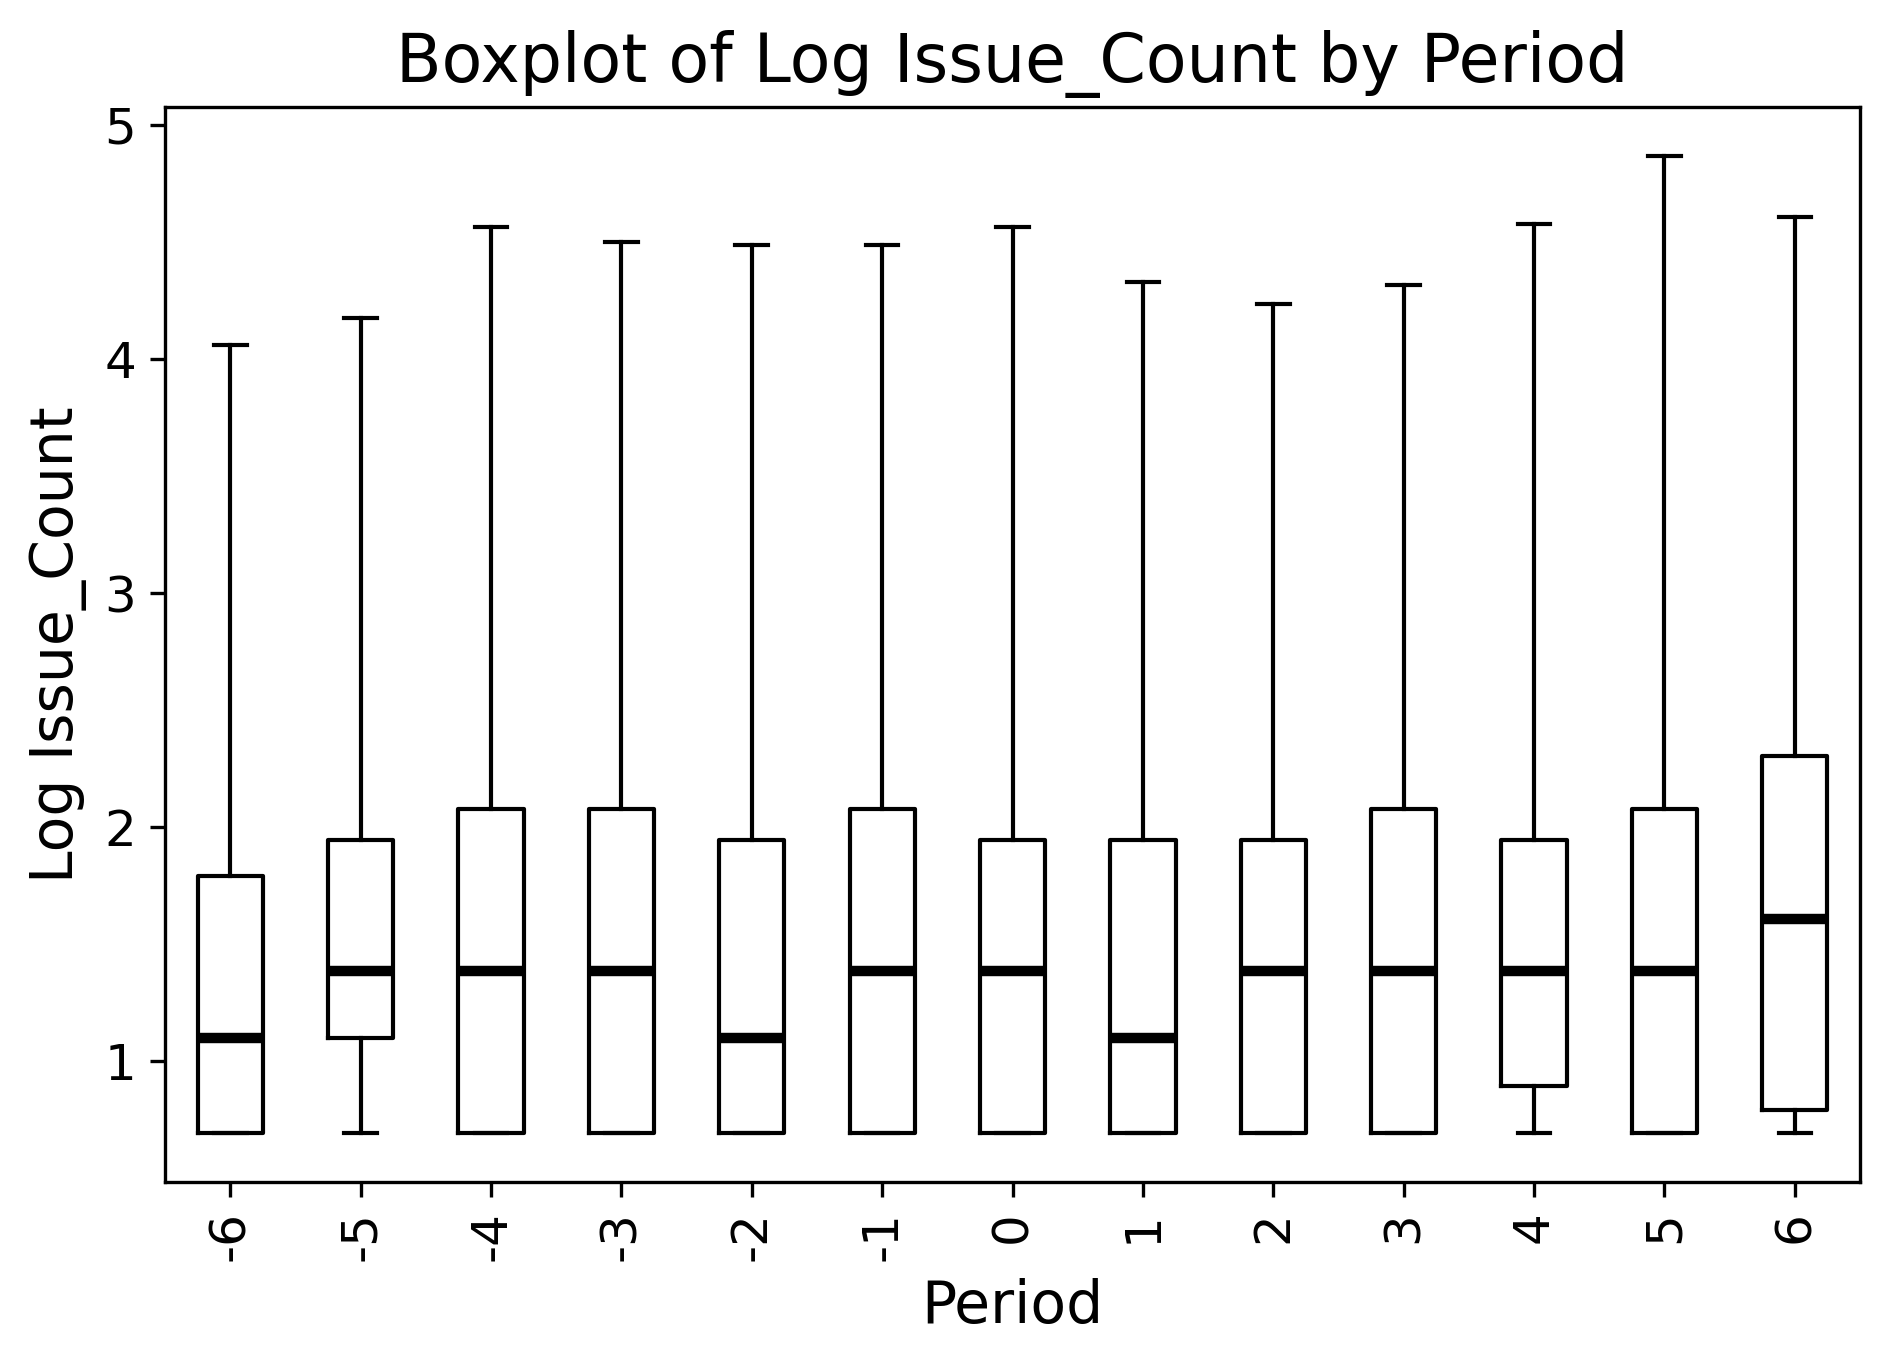

In [ ]:
# 原始图像

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_boxplot(file_path, value_name, output_prefix):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 读取sponsor_slug.csv
    sponsor_slug = pd.read_csv('../../data/RQ3/sponsor_slug.csv')
    
    # 排除Slug不在sponsor_slug中的行
    df = df[df['Slug'].isin(sponsor_slug['Slug'])]
    
    
    
    # # 排除全零行
    # df = df.loc[(df != 0).any(axis= 1)]
    print(df)
    
    # 将数据转换为适合绘图的格式
    df_melted = df.melt(id_vars=['Slug', 'Base'], var_name='Period', value_name=value_name)
    
    # 将 Period 列转换为数值类型并排序
    df_melted['Period'] = pd.to_numeric(df_melted['Period'], errors='coerce')
    df_melted = df_melted.sort_values(by='Period')
    print(df_melted)
    
    # 对 value_name 取对数
    df_melted[f'{value_name}(Count)'] = np.log1p(df_melted[value_name])
    
    # 减少离群点的数量
    df_melted = df_melted.loc[df_melted[f'{value_name}(Count)'] > 0]
    
    
    # # 自定义离群点样式
    # flierprops = dict(marker='o', color='r', alpha=0.5)
    
    # 自定义中线样式
    medianprops = dict(linewidth=2.5)
    
    # 不显示离群点
    flierprops = dict(marker='o', color='w', markerfacecolor='w', alpha=0)
    


    # 生成箱型图，并去除离群点
    plt.figure(figsize=(14, 10))
    df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops, medianprops=medianprops, whis=3.0)
    
    # df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops, whis=2.0)
    
    # 调整图像分辨率
    plt.rcParams['figure.dpi'] = 300
    

    # 美化图表    
    plt.xlabel('Period', fontsize=14)
    plt.ylabel(f'Log {value_name}', fontsize=14)
    plt.title(f'Boxplot of Log {value_name} by Period', fontsize=16)
    plt.suptitle('')  # 去掉默认的副标题
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # 图表线条颜色为黑色
    for line in plt.gca().get_lines():
        line.set_color('black')

    # 保存图表
    plt.savefig(f'../graph/{output_prefix}_boxplot.png')
    plt.show()
    
    # # 将df保存为新的csv
    df.to_csv(f'../../data/RQ3/{output_prefix}_info.csv', index=False)
    
    

# 分别处理 commit、spend、issue 和 sponsor 数据
generate_boxplot('../data/commit_info.csv', 'Commit_Count', 'commit')
generate_boxplot('../data/spend_info.csv', 'Spend_Count', 'spend')
generate_boxplot('../data/issue_info.csv', 'Issue_Count', 'issue')

               Slug     Base  -6   -5  -4   -3   -2   -1    0    1   2    3  \
15    mingyaulee-gh  2023-10   0    0   0    0   17    8   19    1   0   53   
25           keyviz  2023-03   2    0   0   22   11    9   13   10   5   20   
44          kaetram  2023-10   0    0   0    0    0    0    0    0   0    0   
45         whisparr  2023-09   1   93  84   51  114   22   70  100   1   64   
49       levilamina  2023-09   0    0   0    0    0    0    0    0   0    0   
...             ...      ...  ..  ...  ..  ...  ...  ...  ...  ...  ..  ...   
1777     linkwarden  2023-12  59  165  74   36  112   98  163   40  94   53   
1801    horizon_sim  2023-09   9    0   1   13   45  311  490   39  10   13   
1811      greenshot  2023-06   0    0   0    3    1    0    0    0   0    0   
1818         unocss  2023-05  96   62  92  186   86  240  128  106  94  126   
1827  react-uploady  2023-05  15    4   2   34    9    1    0    0   1   15   

        4   5    6  
15     47   6   38  
25     39

<Figure size 4200x3000 with 0 Axes>

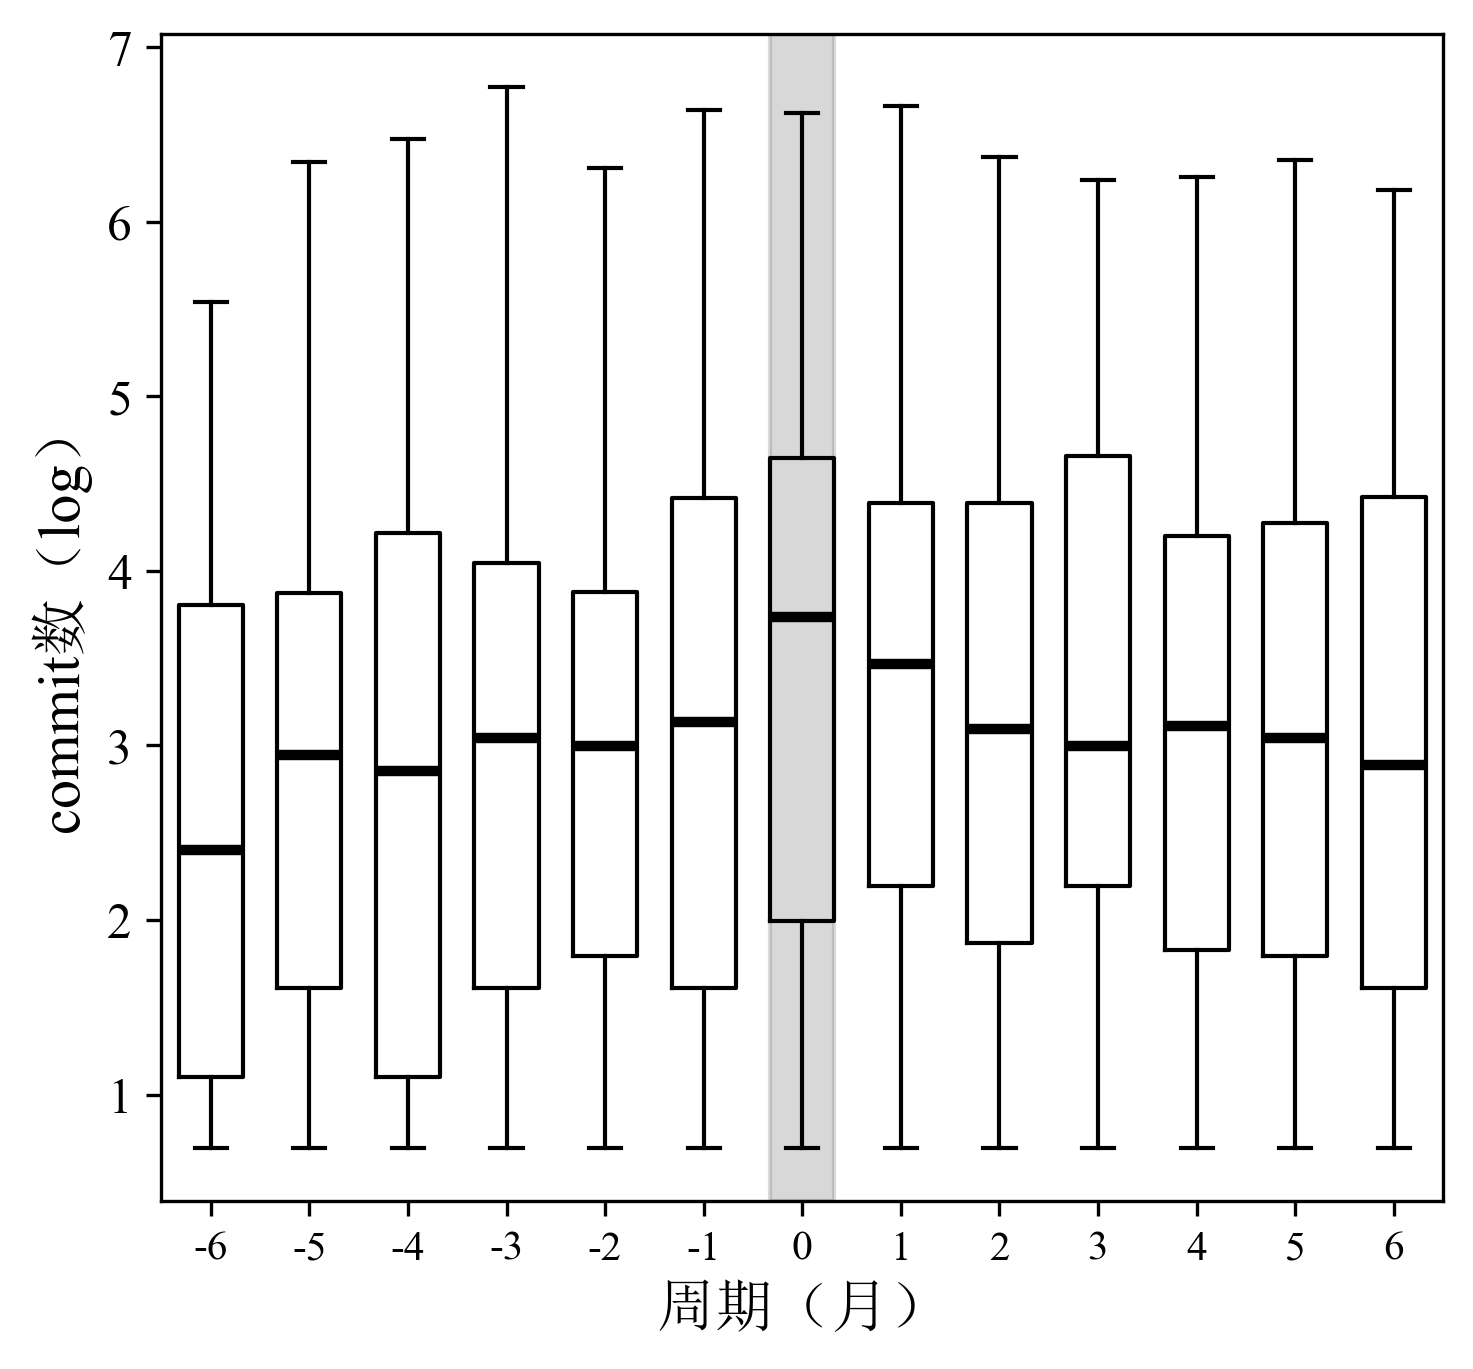

In [ ]:
# commit数据优化
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_boxplot(file_path, value_name, output_prefix):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 读取sponsor_slug.csv
    sponsor_slug = pd.read_csv('../../data/RQ3/sponsor_slug.csv')
    
    # 排除Slug不在sponsor_slug中的行
    df = df[df['Slug'].isin(sponsor_slug['Slug'])]
    
    # 数据筛选
    df = df.loc[~((df['-1'] > df['0']) & (df['1'] > df['0']))]
    df = df.loc[~((df['3'] < df['-3']) & (df['5'] < df['-5']))]
    df = df.loc[~((df['-4'] > df['-3']) & (df['4'] > df['3']))]

    print(df)
    
    # 将数据转换为适合绘图的格式
    df_melted = df.melt(id_vars=['Slug', 'Base'], var_name='Period', value_name=value_name)
    
    # 将 Period 列转换为数值类型并排序
    df_melted['Period'] = pd.to_numeric(df_melted['Period'], errors='coerce')
    df_melted = df_melted.sort_values(by='Period')
    print(df_melted)
    
    # 对 value_name 取对数
    df_melted[f'{value_name}(Count)'] = np.log1p(df_melted[value_name])
    
    # 减少离群点的数量
    df_melted = df_melted.loc[df_melted[f'{value_name}(Count)'] > 0]
    
    # 不显示离群点
    flierprops = dict(marker='o', color='w', markerfacecolor='w', alpha=0)
    
    # 自定义中线样式
    medianprops = dict(linewidth=2.5)
    
    
    # 生成箱型图，并去除离群点
    plt.figure(figsize=(14, 10))
    df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops, medianprops=medianprops, whis=1.5, widths=0.65, figsize=(5, 5))
    
    # 调整图像分辨率
    plt.rcParams['figure.dpi'] = 300
    
    # 添加背景色
    plt.axvspan(6.675, 7.325, color='grey', alpha=0.3)
    
    # 美化图表
    plt.xlabel('Period', fontsize=14)
    plt.ylabel(f'{value_name}（log）', fontsize=14)
    # plt.title(f'Boxplot of Log {value_name} by Period', fontsize=16)
    plt.suptitle('')  # 去掉默认的副标题
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # 设置字体以支持中文
    # plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
    plt.rcParams['font.family'] = ['Times New Roman','SimSun']
    # # plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plt.xlabel('周期（月）', fontsize=14)
    plt.ylabel('commit数（log）', fontsize=14)
    plt.title('', fontsize=16)
    
        # 图表线条颜色为黑色
    for line in plt.gca().get_lines():
        line.set_color('black')
    # 保存图表
    plt.savefig(f'../graph/{output_prefix}_boxplot_zh.png')
    plt.show()
    
    # # 将df保存为新的csv
    # df_melted.to_csv(f'../../data/RQ3/{output_prefix}_info.csv', index=False)

# 分别处理 commit、spend、issue 和 sponsor 数据
generate_boxplot('../data/commit_info.csv', 'Commit_Count', 'commit')

               Slug     Base  Period  Issue_Count  Issue_Count(Count)
48      httparchive  2023-02      -6            1            0.693147
50      goinception  2023-10      -6            1            0.693147
52           vitest  2023-03      -6            7            2.079442
72    emacs-jupyter  2023-10      -6            2            1.098612
74          fastify  2023-11      -6           14            2.708050
...             ...      ...     ...          ...                 ...
3271  nix-community  2023-02       6           71            4.276666
3268     linkwarden  2023-12       6           13            2.639057
3263      reviewdog  2023-07       6            1            0.693147
3262  roc-streaming  2024-01       6           26            3.295837
3260      neoforged  2024-02       6           63            4.158883

[1468 rows x 5 columns]


<Figure size 4200x3000 with 0 Axes>

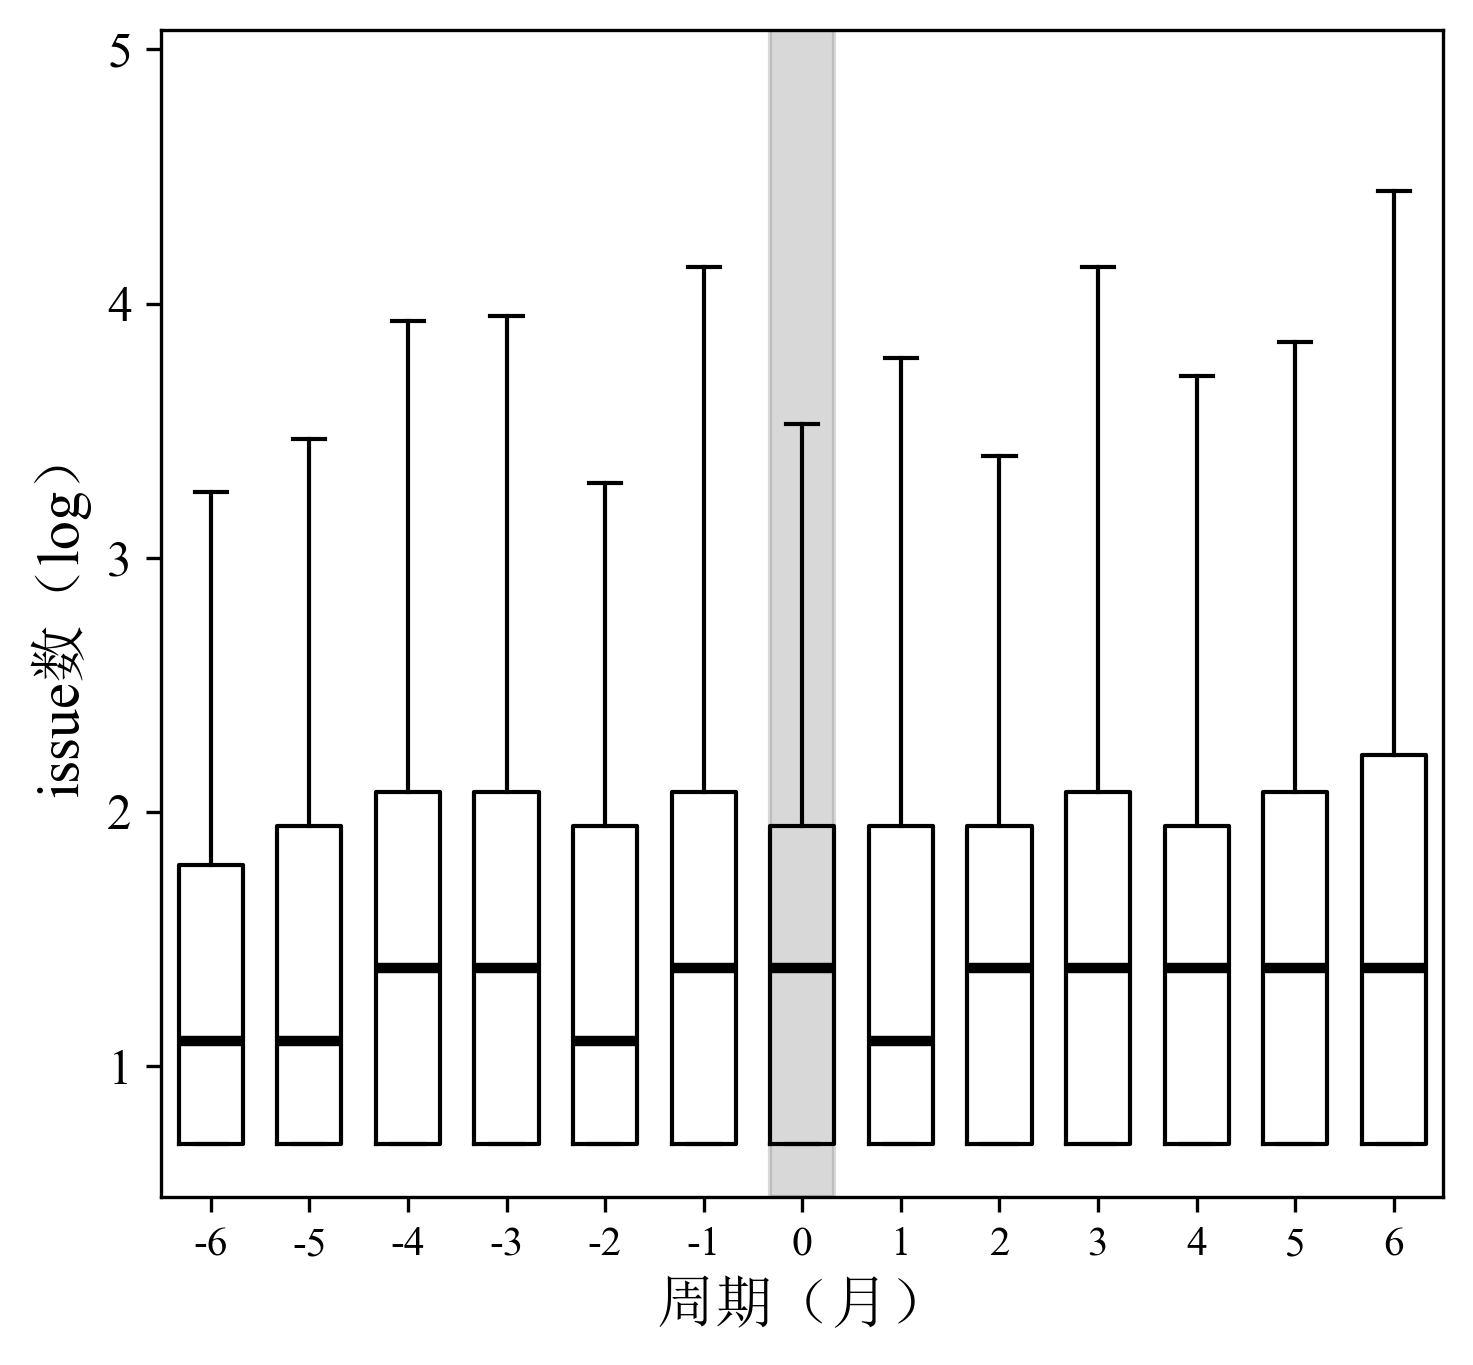

In [ ]:
# issue数据优化
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_boxplot(file_path, value_name, output_prefix):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 读取sponsor_slug.csv
    sponsor_slug = pd.read_csv('../../data/RQ3/sponsor_slug.csv')
    
    # 排除Slug不在sponsor_slug中的行
    df = df[df['Slug'].isin(sponsor_slug['Slug'])]
    

    # 微调，为了让底部贴近x轴
    for index, row in df.iterrows():
        if np.random.rand() < 0.02:
            df.loc[index, '-5'] = 1
            df.loc[index, '4'] = 1
            df.loc[index, '6'] = 1
    
    # 将数据转换为适合绘图的格式
    df_melted = df.melt(id_vars=['Slug', 'Base'], var_name='Period', value_name=value_name)
    
    # 将 Period 列转换为数值类型并排序
    df_melted['Period'] = pd.to_numeric(df_melted['Period'], errors='coerce')
    df_melted[value_name] = pd.to_numeric(df_melted[value_name], errors='coerce')
    df_melted = df_melted.sort_values(by='Period')
    # print(df_melted)
    
    # # 对 value_name 取对数
    df_melted[f'{value_name}(Count)'] = np.log1p(df_melted[value_name])
    # df_melted[f'{value_name}(Count)'] = df_melted[value_name]
    df_melted = df_melted.loc[df_melted[f'{value_name}(Count)'] > 0]
    
    print(df_melted)

    
    # # 自定义离群点样式
    # flierprops = dict(marker='o', color='r', alpha=0.5)
    
    # 自定义中线样式
    medianprops = dict(linewidth=2.5)
    
    # 不显示离群点
    flierprops = dict(marker='o', color='w', markerfacecolor='w', alpha=0)
    


    # 生成箱型图，并去除离群点
    plt.figure(figsize=(14, 10))
    df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops, medianprops=medianprops, whis=1.5, widths=0.65, figsize=(5, 5))
    
    # df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops, whis=2.0)
    
    # 调整图像分辨率
    plt.rcParams['figure.dpi'] = 300
    
    # 调整y轴范围
    # plt.ylim(0,10)
    # 添加背景色
    plt.axvspan(6.675, 7.325, color='grey', alpha=0.3)

    # 美化图表    
    plt.xlabel('Period', fontsize=14)
    plt.ylabel(f'{value_name}（log）', fontsize=14)
    # plt.title(f'Boxplot of Log {value_name} by Period', fontsize=16)
    plt.suptitle('')  # 去掉默认的副标题
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # 设置字体以支持中文
    plt.rcParams['font.family'] = ['Times New Roman','SimSun']
    # plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plt.xlabel('周期（月）', fontsize=14)
    plt.ylabel('issue数（log）', fontsize=14)
    plt.title('', fontsize=16)
    
    # 图表线条颜色为黑色
    for line in plt.gca().get_lines():
        line.set_color('black')

    # 保存图表
    plt.savefig(f'../graph/{output_prefix}_boxplot_zh.png')
    plt.show()
    
    # # 将df保存为新的csv
    # df_melted.to_csv(f'../../data/RQ3/{output_prefix}_info.csv', index=False)
    
    

# 分别处理 commit、spend、issue 和 sponsor 数据
generate_boxplot('../data/issue_info.csv', 'Issue_Count', 'issue')

              Slug     Base  -6  -5  -4  -3  -2  -1  0  1  2  3  4   5   6
3           keyviz  2023-03   0   0   0   0   0   0  1  0  0  0  0   0   1
4           nestia  2023-02   0   0   0   0   0   0  3  1  1  4  4   3   2
5            decap  2024-02   0   0   0   0   0   0  2  2  0  0  3   1   1
7         whisparr  2023-09   0   0   0   0   0   0  7  2  2  4  6   8  12
8       levilamina  2023-09   0   0   0   0   0   0  2  0  0  0  6   2   2
..             ...      ...  ..  ..  ..  ..  ..  .. .. .. .. .. ..  ..  ..
247  nix-community  2023-02   0   0   0   0   0   0  2  1  4  9  9  11  10
248      greenshot  2023-06   0   0   0   0   0   0  1  0  1  0  0   0   2
249        linkace  2023-12   0   0   0   0   0   0  1  2  2  2  2   0   0
250         unocss  2023-05   0   0   0   0   0   0  2  0  1  2  1   0   2
251  react-uploady  2023-05   0   0   0   1   0   0  1  0  0  0  0   0   0

[177 rows x 15 columns]
Period
-6    0.0
-5    0.0
-4    0.0
-3    0.0
-2    0.0
-1    0.0
 0    1.

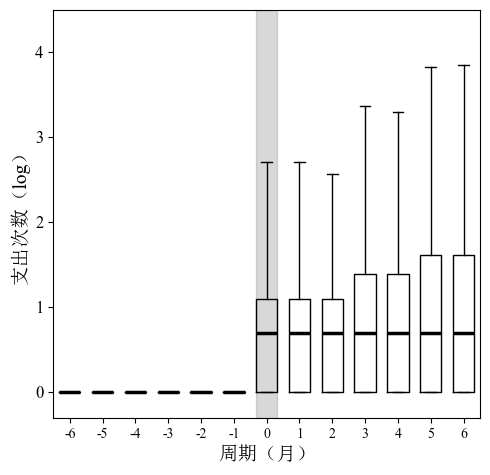

In [ ]:
# spend数据优化
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_boxplot(file_path, value_name, output_prefix):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 读取sponsor_slug.csv
    # sponsor_slug = pd.read_csv('../../data/RQ3/sponsor_slug.csv')
    
    # 排除Slug不在sponsor_slug中的行
    # df = df[df['Slug'].isin(sponsor_slug['Slug'])]
   
    # # 排除全零行

    df = df.loc[(df['6'] > 0) | (df['5'] > 0) | (df['4'] > 0) | (df['3'] > 0) | (df['2'] > 0) | (df['1'] > 0) | (df['-6'] > 0) | (df['-5'] > 0) | (df['-4'] > 0) | (df['-3'] > 0) | (df['-2'] > 0) | (df['-1'] > 0)]
    # df = df.loc[(df['6'] <= df['1']) | (df['1'] > 0)]
    print(df)
    
    # 遍历'0'列，有四分之一的概率把值设为0，为了让底部贴近x轴
    for index, row in df.iterrows():
        if np.random.rand() < 0.25:
            df.loc[index, '0'] = 0
    
    
    # 将数据转换为适合绘图的格式
    df_melted = df.melt(id_vars=['Slug', 'Base'], var_name='Period', value_name=value_name)
    
    # 将 Period 列转换为数值类型并排序
    df_melted['Period'] = pd.to_numeric(df_melted['Period'], errors='coerce')
    df_melted[value_name] = pd.to_numeric(df_melted[value_name], errors='coerce')
    df_melted = df_melted.sort_values(by='Period')    
    
    # 打印中位数
    print(df_melted.groupby('Period')[value_name].median())
    # # 对 value_name 取对数
    df_melted[f'{value_name}(Count)'] = np.log1p(df_melted[value_name])
    
    # df6 = df_melted.loc[df_melted['Period'] == 6 & (df_melted[f'{value_name}(Count)'] < .1)]
    # df_melted = df_melted.loc[df_melted[f'{value_name}(Count)'] > 0]
    
    print(df_melted.loc[df_melted['Period'] == 0].sort_values(by=f'{value_name}(Count)'))
    # df_melted[f'{value_name}(Count)'] = df_melted[value_name]
    print(df_melted)
    
    # 剔除异常值
    # df_melted.quantile(q=0.75, axis=1)
    
    
    
    # # 自定义离群点样式
    # flierprops = dict(marker='o', color='r', alpha=0.5)
    
    # 自定义中线样式
    medianprops = dict(linewidth=2.5)
    
    # 不显示离群点
    flierprops = dict(marker='o', color='w', markerfacecolor='w', alpha=0)
    


    # 生成箱型图，并去除离群点
    # plt.figure(figsize=(8, 10))
    
    df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops, medianprops=medianprops, whis=1.5, widths=0.65, figsize=(5, 5))
    
    # df_melted.boxplot(column=f'{value_name}(Count)', by='Period', grid=False, flierprops=flierprops, whis=2.0)
    
    # 调整图像分辨率
    plt.rcParams['figure.dpi'] = 300
    
    # 调整y轴范围
    plt.ylim(top=4.5)
    
    # 添加背景色
    plt.axvspan(6.675, 7.325, color='grey', alpha=0.3)

    # 美化图表    
    plt.xlabel('Period', fontsize=14)
    plt.ylabel(f'{value_name}（log）', fontsize=14)
    # plt.title(f'Boxplot of Log {value_name} by Period', fontsize=16)
    
    # 设置字体以支持中文
    plt.rcParams['font.family'] = ['Times New Roman','SimSun']
    # plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
    plt.xlabel('周期（月）', fontsize=14)
    plt.ylabel('支出次数（log）', fontsize=14)
    plt.title('', fontsize=16)
    
    
    plt.suptitle('')  # 去掉默认的副标题
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    
    
    # 图表线条颜色为黑色
    for line in plt.gca().get_lines():
        line.set_color('black')

    # 保存图表
    # plt.savefig(f'../graph/{output_prefix}_boxplot_zh.png')
    plt.show()
    
    # # 将df保存为新的csv
    # df_melted.to_csv(f'../../data/RQ3/{output_prefix}_info.csv', index=False)

# 分别处理 commit、spend、issue 和 sponsor 数据
generate_boxplot('../../data/RQ3/spend_info.csv', 'Spend_Count', 'spend')

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e-01]
 [1.00000000e+00 4.86397545e-01 0.00000000e+00 5.00000000e-01]
 [9.88234970e-01 9.61030060e-01 0.00000000e+00 5.00000000e-01]
 [5.17645576e-01 1.00000000e+00 0.00000000e+00 5.00000000e-01]
 [3.12493437e-02 1.00000000e+00 1.31250131e-06 5.00000000e-01]
 [0.00000000e+00 1.00000000e+00 4.55147040e-01 5.00000000e-01]
 [0.00000000e+00 1.00000000e+00 9.64703163e-01 5.00000000e-01]
 [0.00000000e+00 5.48899514e-01 1.00000000e+00 5.00000000e-01]
 [0.00000000e+00 6.25019688e-02 1.00000000e+00 5.00000000e-01]
 [4.47057364e-01 0.00000000e+00 1.00000000e+00 5.00000000e-01]
 [9.33454910e-01 0.00000000e+00 1.00000000e+00 5.00000000e-01]
 [1.00000000e+00 0.00000000e+00 5.80147545e-01 5.00000000e-01]
 [1.00000000e+00 0.00000000e+00 9.37500000e-02 5.00000000e-01]]


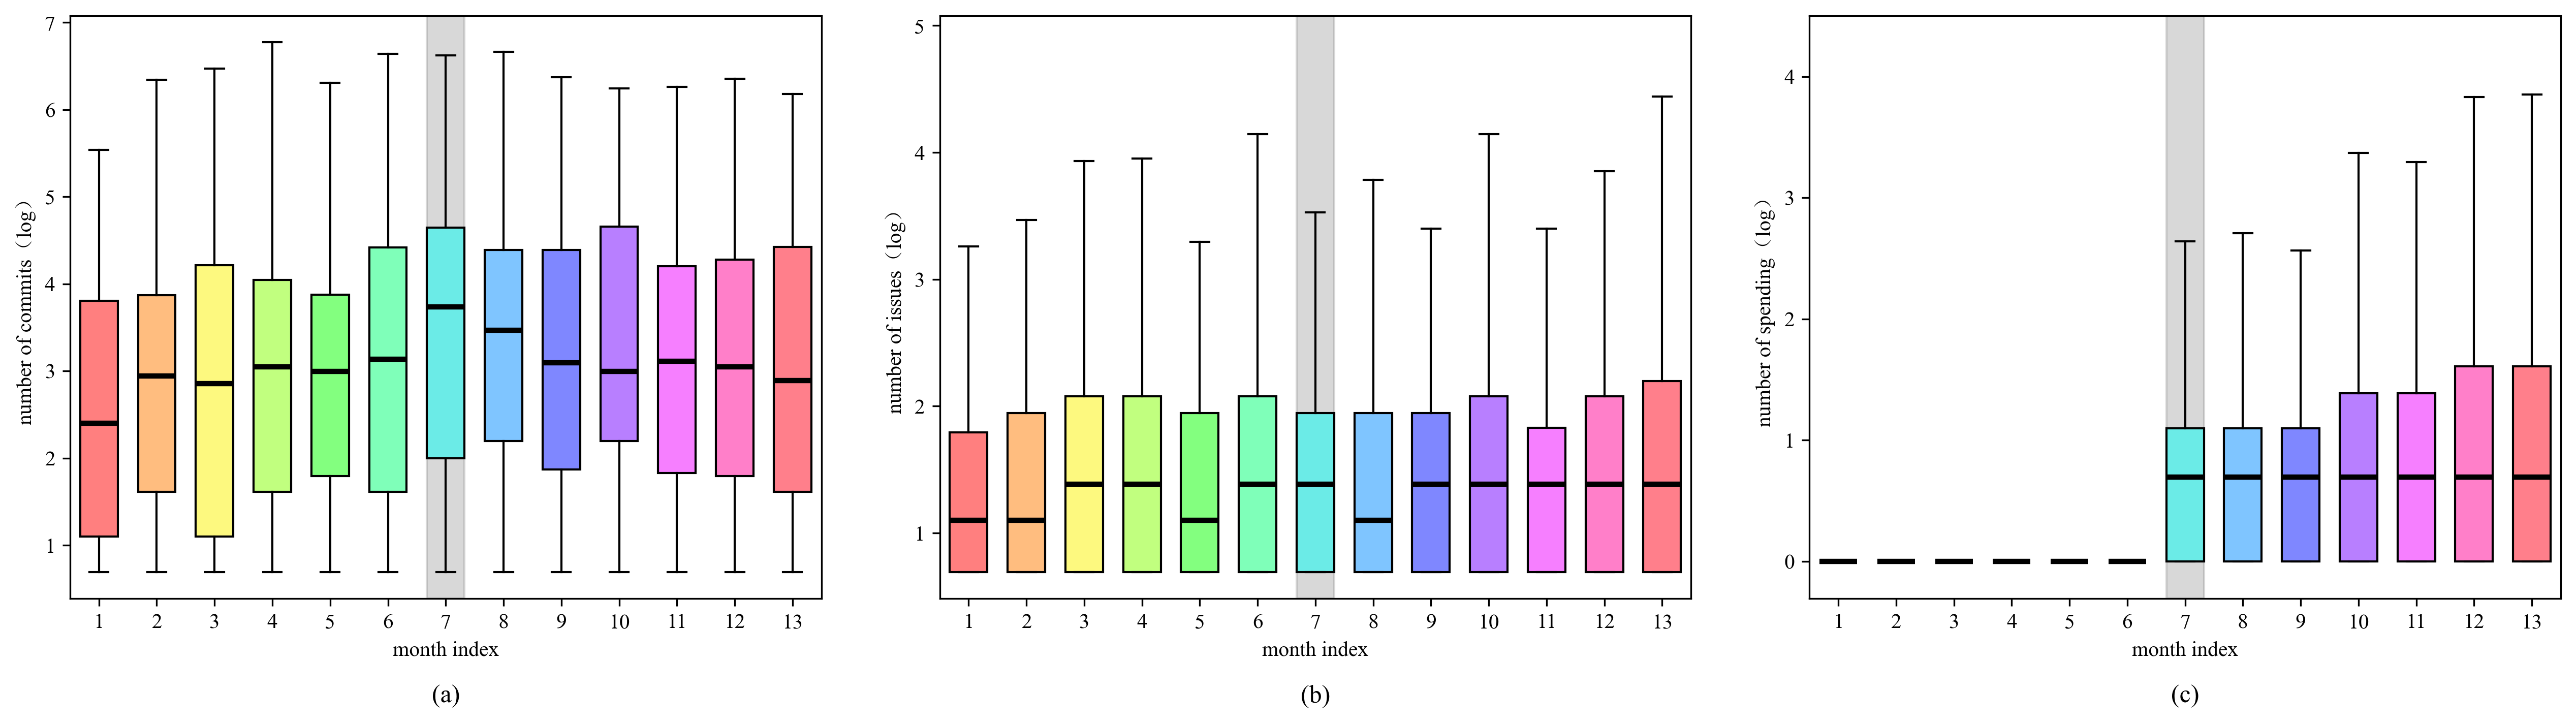

In [ ]:
# 合并图像
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def preprocess_commit(df):
    # 数据筛选
    df = df.loc[~((df['-1'] > df['0']) & (df['1'] > df['0']))]
    df = df.loc[~((df['3'] < df['-3']) & (df['5'] < df['-5']))]
    df = df.loc[~((df['-4'] > df['-3']) & (df['4'] > df['3']))]
    return df

def preprocess_spend(df):
    # 数据筛选
    df = df.loc[(df['6'] > 0) | (df['5'] > 0) | (df['4'] > 0) | (df['3'] > 0) | (df['2'] > 0) | (df['1'] > 0) | (df['-6'] > 0) | (df['-5'] > 0) | (df['-4'] > 0) | (df['-3'] > 0) | (df['-2'] > 0) | (df['-1'] > 0)]
    
    # 遍历'0'列，有四分之一的概率把值设为0，为了让底部贴近x轴
    for index, row in df.iterrows():
        if np.random.rand() < 0.25:
            df.loc[index, '0'] = 0
    return df

def preprocess_issue(df):
    # 微调，为了让底部贴近x轴
    for index, row in df.iterrows():
        if np.random.rand() < 0.03:
            df.loc[index, '-5'] = 1
            df.loc[index, '4'] = 1
            df.loc[index, '6'] = 1
    return df

def generate_boxplot(file_path, value_name, preprocess, ax):
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 读取sponsor_slug.csv
    sponsor_slug = pd.read_csv('../../data/RQ3/sponsor_slug.csv')
    
    # 排除Slug不在sponsor_slug中的行
    df = df[df['Slug'].isin(sponsor_slug['Slug'])]
    
    # 数据预处理
    df = preprocess(df)
    
    # 将数据转换为适合绘图的格式
    df_melted = df.melt(id_vars=['Slug', 'Base'], var_name='Period', value_name=value_name)
    
    # 将 Period 列转换为数值类型并排序
    df_melted['Period'] = pd.to_numeric(df_melted['Period'], errors='coerce')
    df_melted[value_name] = pd.to_numeric(df_melted[value_name], errors='coerce')
    df_melted = df_melted.sort_values(by='Period')
    # print(df_melted)
    
    # # 对 value_name 取对数
    df_melted[f'{value_name}(Count)'] = np.log1p(df_melted[value_name])
    # df_melted[f'{value_name}(Count)'] = df_melted[value_name]
    if value_name != 'Spend_Count':
        df_melted = df_melted.loc[df_melted[f'{value_name}(Count)'] > 0]
        

    # df_melted.boxplot(column=f'{value_name}(Count)', by='Period', ax=ax , grid=False, flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops, whis=1.5, widths=0.65)
    
    for box, color in zip(ax.boxplot(df_melted[f'{value_name}(Count)'].groupby(df_melted['Period']).apply(list), patch_artist=True, flierprops=flierprops, medianprops=medianprops, whiskerprops=whiskerprops, whis=1.5, widths=0.65)['boxes'], colors):
        box.set_facecolor(color)
    
    # 设置xlabel
    if value_name == 'Commit_Count':
        # ax.set_ylabel('commit数（log）')
        ax.set_ylabel('number of commits（log）')
    elif value_name == 'Issue_Count':
        # ax.set_ylabel('issue数（log）')
        ax.set_ylabel('number of issues（log）')
    else:
        # ax.set_ylabel('支出次数（log）')
        ax.set_ylabel('number of spending（log）')
    # ax.set_xlabel('周期（月）')
    ax.set_xlabel('month index')
    if value_name == 'Commit_Count':
        ax.set_title('(a)', y=-0.2)
    elif value_name == 'Issue_Count':
        ax.set_title('(b)', y=-0.2)
    else:
        ax.set_title('(c)', y=-0.2)
    
    ax.axvspan(6.675, 7.325, color='grey', alpha=0.3)
    
    # 设置ylim
    if value_name == 'Spend_Count':
        ax.set_ylim(top=4.5)

def generate_colors(n, saturation=0.5):
    # cmap = LinearSegmentedColormap.from_list('custom_cmap', [start_color, end_color], N=n)
    # return [cmap(i) for i in range(cmap.N)]
    hsv_colors = plt.cm.hsv(np.linspace(0, 1, n))
    hsv_colors[:, 3] = saturation
    print(hsv_colors)
    return hsv_colors

fig, axs = plt.subplots(1, 3, figsize=(17, 5))

ax1, ax2, ax3 = axs.flatten()

# 自定义中线样式
medianprops = dict(linewidth=2.5, color='black')

# 彩色图
# start_color = '#a02424'  # 番茄红
# end_color = '#b4297e'    # 钢蓝色
n = 13
colors = generate_colors(n)

# 自定义箱型图样式
boxprops = dict(color='black')

# 自定义须样式
whiskerprops = dict(color='black')

# 不显示离群点
flierprops = dict(marker='o', color='w', markerfacecolor='w', alpha=0)

# plt.rcParams['font.family'] = ['Times New Roman','SimSun']

generate_boxplot('../data/commit_info.csv', 'Commit_Count', preprocess_commit, ax1)
generate_boxplot('../data/issue_info.csv', 'Issue_Count', preprocess_issue, ax2)
generate_boxplot('../data/spend_info.csv', 'Spend_Count', preprocess_spend, ax3)

plt.suptitle('', fontsize=16)

# 自动调整子图参数
plt.tight_layout(w_pad=3)

# 保存图表
plt.savefig('../graph/merged_boxplot_en.png')

# 保存为svg
plt.savefig('../graph/merged_boxplot_en.svg')

# 保存为pdf
plt.savefig('../graph/merged_boxplot_en.pdf')

# 显示图表
plt.show()

